# Multi-Label Classification
### Random Forest Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import sklearn
from sklearn import metrics, model_selection, tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.preprocessing import label_binarize

#### Carga de data sets
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

In [2]:
# Train data
X_train = pd.read_csv('x_train.csv').to_numpy()
y_train = pd.read_csv('y_train.csv')
y_train = y_train['LABEL']

# Test data
X_test = pd.read_csv('x_test.csv').to_numpy()
y_test = pd.read_csv('y_test.csv')
y_test = y_test['LABEL']

# Validation data
X_validation = pd.read_csv('x_validation.csv').to_numpy()
y_validation = pd.read_csv('y_validation.csv')
y_validation = y_validation['LABEL']

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
clf = RandomForestClassifier(max_depth=3, random_state=6, n_jobs=10, n_estimators=100)

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_jobs=10, random_state=6)

#### Validation Data

In [6]:
clf.score(X_validation, y_validation)

0.9741294666661764

In [7]:
pred_validation = clf.predict(X_validation)

In [8]:
print(metrics.accuracy_score(y_validation, pred_validation))
print('Matriz de confusion Random Forest Classifier\n', metrics.confusion_matrix(y_validation, pred_validation))
print(metrics.classification_report(y_validation, pred_validation, target_names=['0', '1', '2', '3']))

0.9741294666661764
Matriz de confusion Random Forest Classifier
 [[61498   997  4687  1283]
 [   67 64894     0     0]
 [    1     0 92343     0]
 [    0     0     0 46161]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     68465
           1       0.98      1.00      0.99     64961
           2       0.95      1.00      0.98     92344
           3       0.97      1.00      0.99     46161

    accuracy                           0.97    271931
   macro avg       0.98      0.97      0.97    271931
weighted avg       0.98      0.97      0.97    271931



#### Test data

In [9]:
predictions = clf.predict(X_test)

In [10]:
clf.score(X_test, y_test)

0.9745988045643905

In [11]:
print(metrics.accuracy_score(y_test, predictions))
print('Matriz de confusion Random Forest Classifier\n', metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions, target_names=['0', '1', '2', '3']))

0.9745988045643905
Matriz de confusion Random Forest Classifier
 [[124669   1941   9278   2661]
 [   139 133153      1      0]
 [     4      0 187443      0]
 [     0      0      0  92811]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    138549
           1       0.99      1.00      0.99    133293
           2       0.95      1.00      0.98    187447
           3       0.97      1.00      0.99     92811

    accuracy                           0.97    552100
   macro avg       0.98      0.97      0.98    552100
weighted avg       0.98      0.97      0.97    552100



In [12]:
import joblib

In [13]:
joblib.dump(clf, 'modelo2.h5')

['modelo2.h5']

## Grafica ROC
Extraído de: https://laurenliz22.github.io/roc_curve_multiclass_predictions_random_forest_classifier

In [14]:
#Calculate the y_score
y_score = clf.predict_proba(X_test)

In [15]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

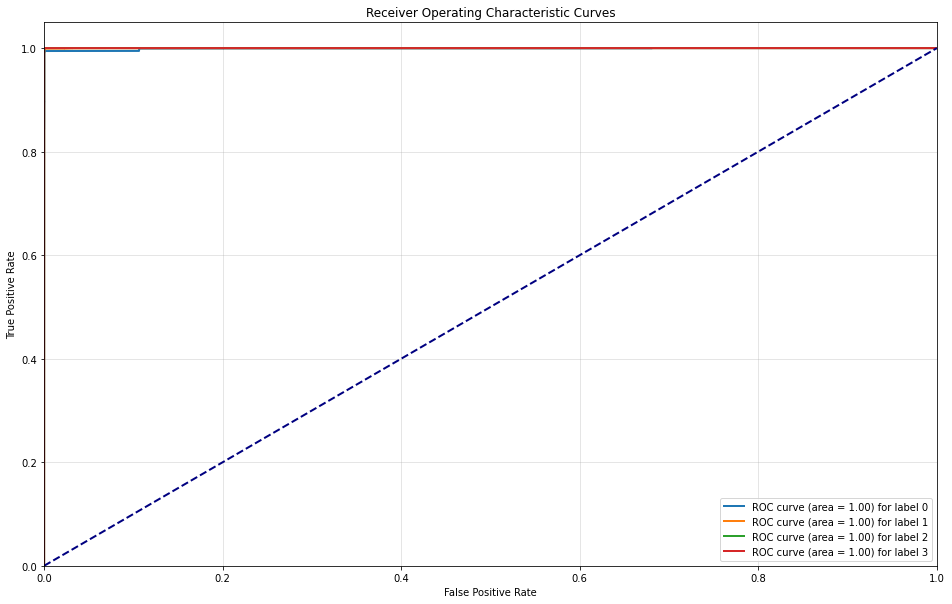

In [16]:
plt.rcParams['figure.figsize'] = (16, 10)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for label %i' % (metrics.auc(fpr[i], tpr[i]), i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="best")
plt.grid(alpha=.4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

## Cross Validation
Fuente de consulta: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

In [17]:
rf_cv_score=cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(rf_cv_score)

[0.97336047 0.97434344 0.97274487 0.97404557 0.97549521 0.97372785
 0.97421437 0.97182148 0.97431366 0.97426376]


In [18]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [19]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.975 (0.001)


In [20]:
kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=None) 

for train_index, test_index in kf.split(X_train):
      print("Train:", train_index, "Validation:",test_index)
      x_train, x_test = X_train[train_index], X_train[test_index] 
      Y_train, Y_test = y_train[train_index], y_train[test_index]

Train: [      0       1       3 ... 1007146 1007147 1007148] Validation: [      2       6      17 ... 1007091 1007125 1007130]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     13      23      32 ... 1007108 1007112 1007119]
Train: [      0       1       2 ... 1007145 1007146 1007148] Validation: [     14      19      24 ... 1007128 1007137 1007147]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [      7      12      20 ... 1007134 1007139 1007144]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     31      66      73 ... 1007126 1007142 1007143]
Train: [      1       2       3 ... 1007146 1007147 1007148] Validation: [      0      16      25 ... 1007092 1007096 1007131]
Train: [      0       1       2 ... 1007144 1007145 1007147] Validation: [      4       8       9 ... 1007141 1007146 1007148]
Train: [      0       2       4 ... 1007146 1007147 1007148] Validation: [      1       3      10 ... 1007132 1

In [21]:
kf = KFold(n_splits=10)
for train, test in kf.split(X_train):
    print("%s %s" % (train, test))

[ 100715  100716  100717 ... 1007146 1007147 1007148] [     0      1      2 ... 100712 100713 100714]
[      0       1       2 ... 1007146 1007147 1007148] [100715 100716 100717 ... 201427 201428 201429]
[      0       1       2 ... 1007146 1007147 1007148] [201430 201431 201432 ... 302142 302143 302144]
[      0       1       2 ... 1007146 1007147 1007148] [302145 302146 302147 ... 402857 402858 402859]
[      0       1       2 ... 1007146 1007147 1007148] [402860 402861 402862 ... 503572 503573 503574]
[      0       1       2 ... 1007146 1007147 1007148] [503575 503576 503577 ... 604287 604288 604289]
[      0       1       2 ... 1007146 1007147 1007148] [604290 604291 604292 ... 705002 705003 705004]
[      0       1       2 ... 1007146 1007147 1007148] [705005 705006 705007 ... 805717 805718 805719]
[      0       1       2 ... 1007146 1007147 1007148] [805720 805721 805722 ... 906432 906433 906434]
[     0      1      2 ... 906432 906433 906434] [ 906435  906436  906437 ... 10071